# Face Landmark Detection using python
    - https://towardsdatascience.com/face-landmark-detection-using-python-1964cb620837

In [1]:
import imutils
from imutils import face_utils
# import imutils
import cv2
# dlib = C++ lang.
# in conda terminal, pip install cmake then pip install dlib (error, https://updaun.tistory.com/entry/python-python-37-dlib-install-error)
import dlib 
import numpy as np

In [3]:
# detect one more face (dlib function)
detector = dlib.get_frontal_face_detector()
# detecting keypoints from face. (pretrained weight - https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat)
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
# capturing from webcam 
cap = cv2.VideoCapture(0) #parameter == 0

In [4]:
# webcam opened?
if cap.isOpened():
    print(f'width : {cap.get(3)}, height : {cap.get(4)}')

width : 640.0, height : 480.0


In [5]:
# frame == captured image
ret, frame = cap.read()
print('ret',ret)
print('frame',frame.shape)

ret True
frame (480, 640, 3)


##### Fail

In [11]:

# gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# cv2.imshow('video',gray) # window opened 
# # wait for seconds
# # cv2.waitKey(5) & 0xFF # & 0xFF for 32 bits
# rects = detector(gray,1)

# for i, rect in enumerate(rects):
#     shape = predictor(gray, rect)
#     print(shape)
#     shape = face_utils.shape_to_np(shape)
#     print(shape)
#     (x,y,w,h) = face_utils.rect_to_bb(rect)
#     cv2.rectangle(gray,(x,y), (x+w,y+h),(0,255,0),2)
#     for (x,y) in shape:
#         cv2.circle(gray, (x,y), 1, (0,0,255),-1)
        
# # cv2.imshow(gray)
# # cv2.waitkey(3)
# cv2.destroyAllWindows() # closeed all windows

##### Another

In [ ]:
while True:
    ret, image = cap.read()
    # print(ret, image.shape)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects =detector(gray,1)
    # print(rects)
    for rect in rects:
        shape = predictor(gray, rect)
        shape_np = np.zeros( (68,2), dtype = 'int')
        for i in range(0, 68):
            shape_np[i] = (shape.part(i).x , shape.part(i).y)
        shape = shape_np
        for i, (x,y) in enumerate(shape):
            cv2.circle(image, (x,y), 2, (0,255,0), -1)
        
    cv2.imshow('test',image)

    if cv2.waitKey(1) == 27:
        break

cap.release()

In [11]:
cv2.destroyAllWindows() # closeed all windows

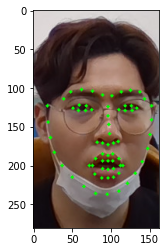

In [12]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('./test1.png'))

<img src="test1.png">

# Face Mesh

In [17]:
import cv2
import mediapipe as mp

In [18]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
rawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)

with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
  while True:
    success, image = cap.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ## image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    # image.flags.writeable = False    
    results = face_mesh.process(image)
    # image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image = image,
                landmark_list = face_landmarks,
                connections = mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec = None,
                connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style()
            )
    cv2.imshow('Test',image)
    if cv2.waitKey(5) % 0xFF == 27:
        break
    
cap.release()


In [10]:
cv2.destroyAllWindows() # closeed all windows

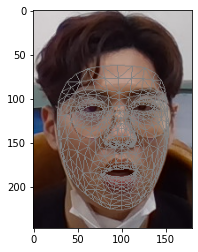

In [13]:
plt.imshow(plt.imread('./test2.png'))

<img src="test2.png">

# Specific Points

In [ ]:
while True:
    ret, image = cap.read()
    # print(ret, image.shape)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects =detector(gray,1)
    # print(rects)
    for rect in rects:
        shape = predictor(gray, rect)
        shape_np = np.zeros( (68,2), dtype = 'int')
        for i in range(0, 68):
            shape_np[i] = (shape.part(i).x  , shape.part(i).y - 150)
        shape = shape_np
        print(shape)
        for i, (x,y) in enumerate(shape):
            cv2.circle(image, (x,y), 4, (0,0,0), -1)
        
    cv2.imshow('test',image)

    if cv2.waitKey(1) == 27:
        break

cap.release()

In [17]:
cv2.destroyAllWindows() # closeed all windows

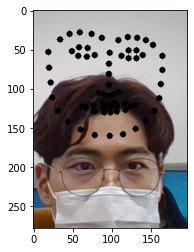

In [14]:
plt.imshow(plt.imread('./test3.png'))

<img src="test3.png">